# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [70]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [36]:
data.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                     

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [38]:
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [39]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Antes de empezar voy a estandarizar los datos para intentar reducir la variabiidad entre los datos de cada columna

In [40]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## 1. Train a [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering model on the data set using 8 clusters and compute the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for the model.

In [41]:
km8 = KMeans()
km8.fit(X)

KMeans()

In [42]:
y_pred8 = km8.predict(X)
y_pred8

array([1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 4, 4, 1, 4, 1, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 5, 5, 6, 6, 2, 2,
       6, 6, 5, 0, 5, 4, 2, 4, 6, 6, 6, 5, 0, 2, 6, 6, 2, 3, 2, 6, 2, 2,
       2, 2, 2, 2, 5, 6, 6, 0, 0, 6, 6, 2, 6, 6, 2, 6, 6, 2, 6, 2, 6, 2,
       6, 6, 2, 2, 2, 2, 6, 2, 5, 6, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5,
       5, 5, 5, 5, 3, 3, 3, 3, 3, 5, 3, 3, 7, 3, 3, 3, 7, 7, 7, 7, 7, 7,
       5, 3, 7, 3, 7, 7, 3, 3, 3, 5, 7, 3, 7, 7, 7, 7, 5, 7, 7, 3, 7, 7,
       7, 7], dtype=int32)

In [43]:
cross = pd.crosstab(y_pred8, y)
cross

col_0,0,1,2
row_0,,,
0,0,4,0
1,47,0,0
2,0,31,0
3,0,1,17
4,11,3,0
5,0,7,10
6,1,25,0
7,0,0,21


In [44]:
silhouette_score(X, y_pred8)

0.15867128179749249

Calculate the goodness of the clustering. Ranges from -1 to 1. 
> - 1: Means clusters are clearly distinguished.


> - 0: Means clusters are indifferent.


> - -1: Means clusters are assigned in the wrong way.  

So, our results indicate that the clusters that we have created are not very well described



[silhouette_score](https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c)

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [45]:
km5 = KMeans(n_clusters = 5)
km5.fit(X)

KMeans(n_clusters=5)

In [46]:
y_pred5 = km5.predict(X)
y_pred5

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 4, 3, 3, 0, 0,
       3, 3, 4, 3, 4, 0, 0, 1, 3, 3, 3, 4, 3, 0, 3, 3, 0, 4, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 1, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 0,
       3, 3, 0, 0, 0, 0, 3, 0, 4, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [47]:
cross5 = pd.crosstab(y_pred5, y)
cross5

col_0,0,1,2
row_0,,,
0,1,29,0
1,57,2,0
2,0,0,27
3,1,33,0
4,0,7,21


In [48]:
silhouette_score(X, y_pred5)

0.20225838613809624

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [49]:
km3 = KMeans(n_clusters = 3)
km3.fit(X)

KMeans(n_clusters=3)

In [50]:
y_pred3 = km3.predict(X)
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [51]:
cross3 = pd.crosstab(y_pred3, y)
cross3

col_0,0,1,2
row_0,,,
0,59,3,0
1,0,3,48
2,0,65,0


In [52]:
silhouette_score(X, y_pred3)

0.2848589191898987

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

In [53]:
kmeans = [KMeans(n_clusters=i) for i in range(1,21)]
for model in kmeans:
    model.fit(X)

In [ ]:
inertias = [model.inertia_ for model in kmeans]
inertias

'''
for model in kmeans:
    inertias = []
    inertias.append(model.inertia_)
    print(inertias)
'''

**There are two ways to do it**

In [ ]:
plt.plot(range(1,21),inertias)
plt.xticks(range(1,21));

In [ ]:
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette') #model for a range of K values from 1 to 21
visualizer.fit(X)        
visualizer.show()        

Help to select the optimal number of clusters by fitting the model with a range of values for K. 
metric could be: 
 - `distortion`, by default. Mean sum of squared distances to centers 
 
 
 - `silhouette`. Mean ratio of intra-cluster and nearest-cluster distance
 
 
 - `calinski_harabasz`. Ratio of within to between cluster dispersion 
 
**Note**: `make_blobs` generate isotropic Gaussian blobs for clustering.  


> X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42) ==> **cluster with 1000 points center in 8**

 
[KElbowVisualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

## 5. Try performing the same elbow tests with an [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) model and compare the results you get to the KMeans results.

In [54]:
#For n_clusters = 3
ac3 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
ac3.fit(X)
ac3.labels_ #returns an array of integers where the values correspond to the distinct categories

y_pred_ac3 = ac3.fit_predict(X)
y_pred_ac3[:5]

array([0, 0, 0, 0, 0])

In [55]:
silhouette_score(X, y_pred_ac3)

0.18674235566758707

In [56]:
#For n_clusters = 5
ac5 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
ac5.fit(X)
ac5.labels_

y_pred_ac5 = ac5.fit_predict(X)
y_pred_ac5[:5]


array([0, 0, 0, 0, 0])

In [57]:
silhouette_score(X, y_pred_ac5)

0.18674235566758707

In [58]:
#For n_clusters = 8
ac8 = AgglomerativeClustering( affinity='euclidean', linkage='ward')
ac8.fit(X)
ac8.labels_

y_pred_ac8 = ac8.fit_predict(X)
y_pred_ac8[:5]

array([0, 0, 0, 0, 0])

In [ ]:
silhouette_score(X, y_pred_ac8)

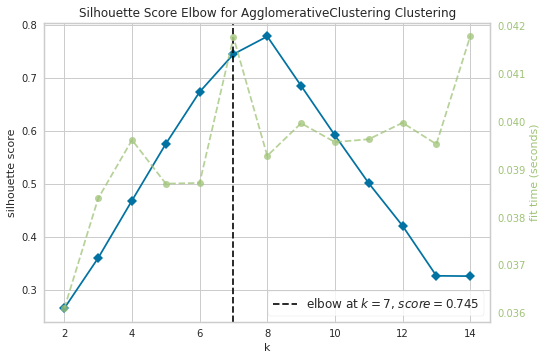

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [59]:
# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette') #model for a range of K values from 1 to 21
visualizer.fit(X)        
visualizer.show() 

## 6. Create and plot a scatter matrix (pairplot) showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [71]:
# The best number of clusters is 7. On the other hand, showing the silhouette values for each model the best
    ##score was the Kmeans
    
km7 = KMeans()
km7.fit(X)
y_pred7 = km7.predict(X)
y_pred7
silhouette_score(X, y_pred7)

0.5398971441034137

In [81]:
data_kmeans = pd.DataFrame(X, columns = X.columns)

In [82]:
data_kmeans["pred_cluster"] = y_pred7

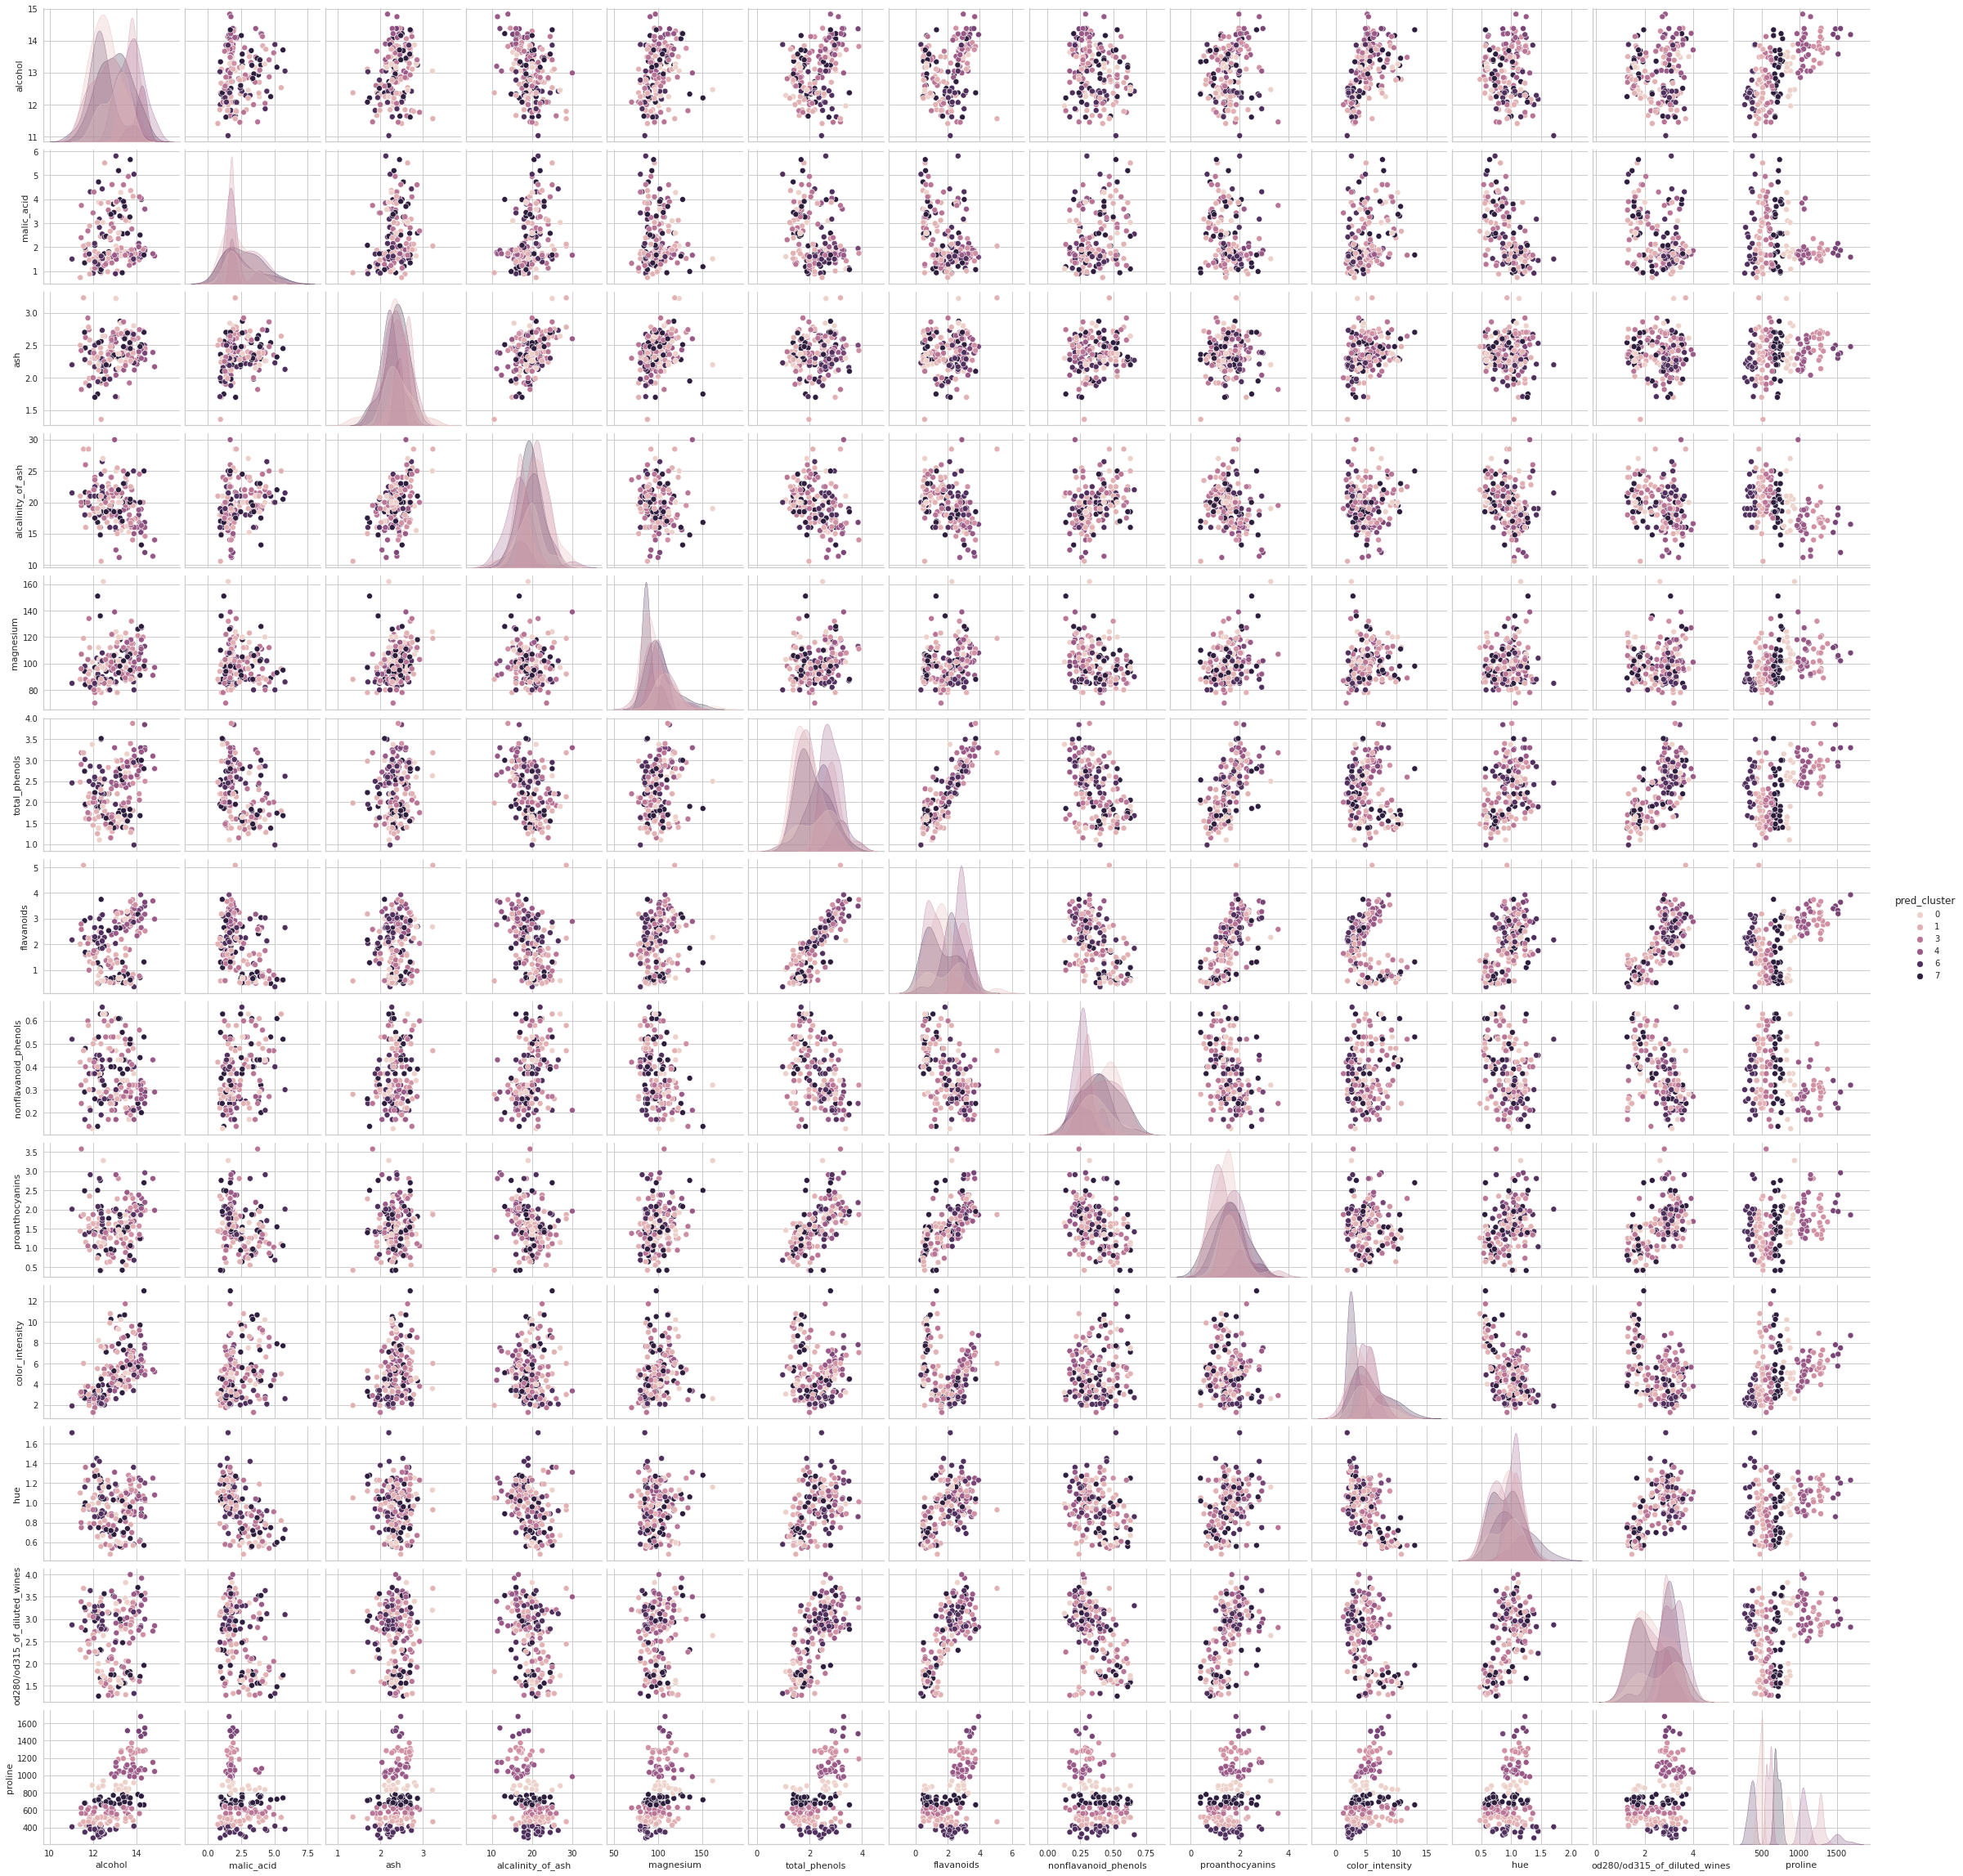

In [75]:
sns.pairplot(data_kmeans, hue="pred_cluster")

## 7. Apply a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) transform and plot the first two principle components with the plot point colors determined by cluster.

In [78]:
pca = PCA(2)
data_transformed = pd.DataFrame(pca.fit_transform(data_kmeans), columns=["PC1","PC2"])

In [79]:
data_transformed.head()

,PC1,PC2
0,318.562629,21.484285
1,303.097072,-5.371345
2,438.061971,-6.524656
3,733.239107,0.173811
4,-11.573535,18.455000


/home/anagarcia/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


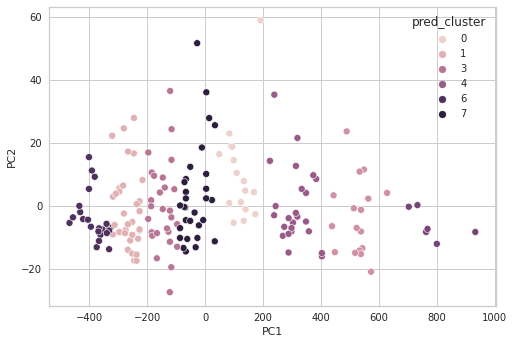

In [83]:
pca_plot = sns.scatterplot(data_transformed["PC1"],data_transformed["PC2"], hue= data_kmeans["pred_cluster"])

## 8. Generate a series of [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) plots showing the clusters at a variety of perplexities.

In [84]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, learning_rate=200)

In [88]:
wine_tsne = pd.DataFrame(tsne.fit_transform(data_kmeans))

In [89]:
wine_tsne.head()

,0,1
0,8.038722,-8.131199
1,7.244617,-8.391071
2,9.245706,-10.065574
3,11.279871,-12.149920
4,1.648348,-1.921529


/home/anagarcia/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

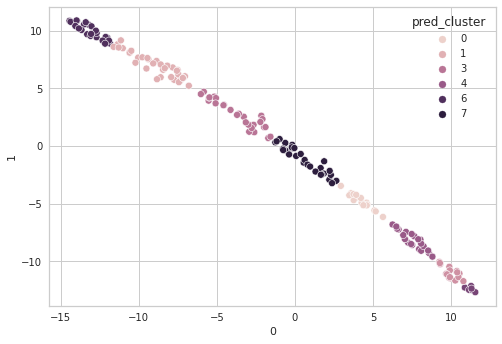

In [90]:
sns.scatterplot(wine_tsne[0],wine_tsne[1], hue=data_kmeans["pred_cluster"])
